## Oscilaciones transversales de dos masas identicas acopladas
Dos pesas de idéntica masa están apoyadas en una mesa sin rozamiento,
sujetas a las paredes por resortes de constante elástica $K_1$ y unidas entre
sí por otro con distinta constante $K_2$ . Obtenga las frecuencias y los modos
transversales del sistema

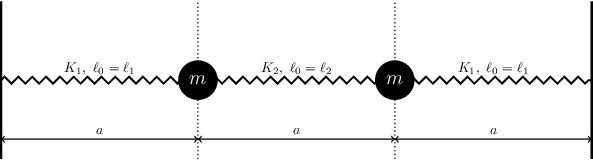

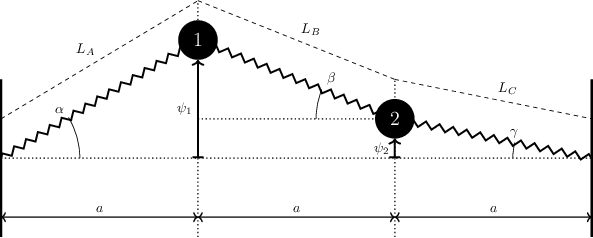

In [ ]:
import sympy as sp
from sympy.physics.mechanics import init_vprinting
init_vprinting()

m,k1,k2,l1,l2,a=sp.symbols("m K_1 K_2 ell_1 ell_2 a",positive=True)
la,lb,lc=sp.symbols("L_a, L_b, L_c", positive=True)
alpha,beta,gamma=sp.symbols("alpha beta gamma",positive=True)
t=sp.symbols("t")
psi1=sp.Function("psi_1")(t)
psi2=sp.Function("psi_2")(t)

In [ ]:
estatica=sp.Eq(k1*(a-l1),k2*(a-l2))
estatica

In [ ]:
ecuacion_longitd2=sp.Eq(l2,sp.solve(estatica,l2)[0])
ecuacion_longitd2

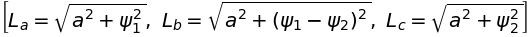

In [ ]:
pitagoras=[sp.Eq(la,sp.sqrt(psi1**2+a**2)),
           sp.Eq(lb,sp.sqrt((psi1-psi2)**2+a**2)),
           sp.Eq(lc,sp.sqrt(psi2**2+a**2))]
pitagoras

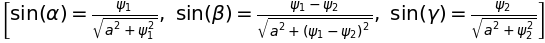

In [ ]:
senos=[sp.Eq(sp.sin(alpha),psi1/pitagoras[0].rhs),
       sp.Eq(sp.sin(beta),(psi1-psi2)/pitagoras[1].rhs),
       sp.Eq(sp.sin(gamma),psi2/pitagoras[2].rhs)]
senos

In [ ]:
newton=[sp.Eq(sp.diff(psi1,t,2),(-k1*(la-l1)*sp.sin(alpha)-k2*(lb-l2)*sp.sin(beta))/m),
        sp.Eq(sp.diff(psi2,t,2),(-k1*(lc-l1)*sp.sin(gamma)+k2*(lb-l2)*sp.sin(beta))/m)]
newton

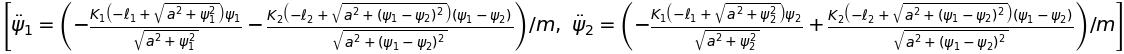

In [ ]:
sustituciones=[(sp.sin(alpha),senos[0].rhs),
               (sp.sin(beta),senos[1].rhs),
               (sp.sin(gamma),senos[2].rhs),
               (la,pitagoras[0].rhs),
               (lb,pitagoras[1].rhs),
               (lc,pitagoras[2].rhs)]

newton_subs=[newton[0].subs(sustituciones),newton[1].subs(sustituciones)]
newton_subs

In [ ]:
def taylor_orden1(f):
    return (f.subs([(psi1,0),(psi2,0)])
           +sp.diff(f,psi1).subs([(psi1,0),(psi2,0)])*psi1
           +sp.diff(f,psi2).subs([(psi1,0),(psi2,0)])*psi2)

In [ ]:
pitagoras_lin=[]
for i in range(3):
    pitagoras_lin.append(sp.Eq(pitagoras[i].lhs, taylor_orden1(pitagoras[i].rhs)))
pitagoras_lin

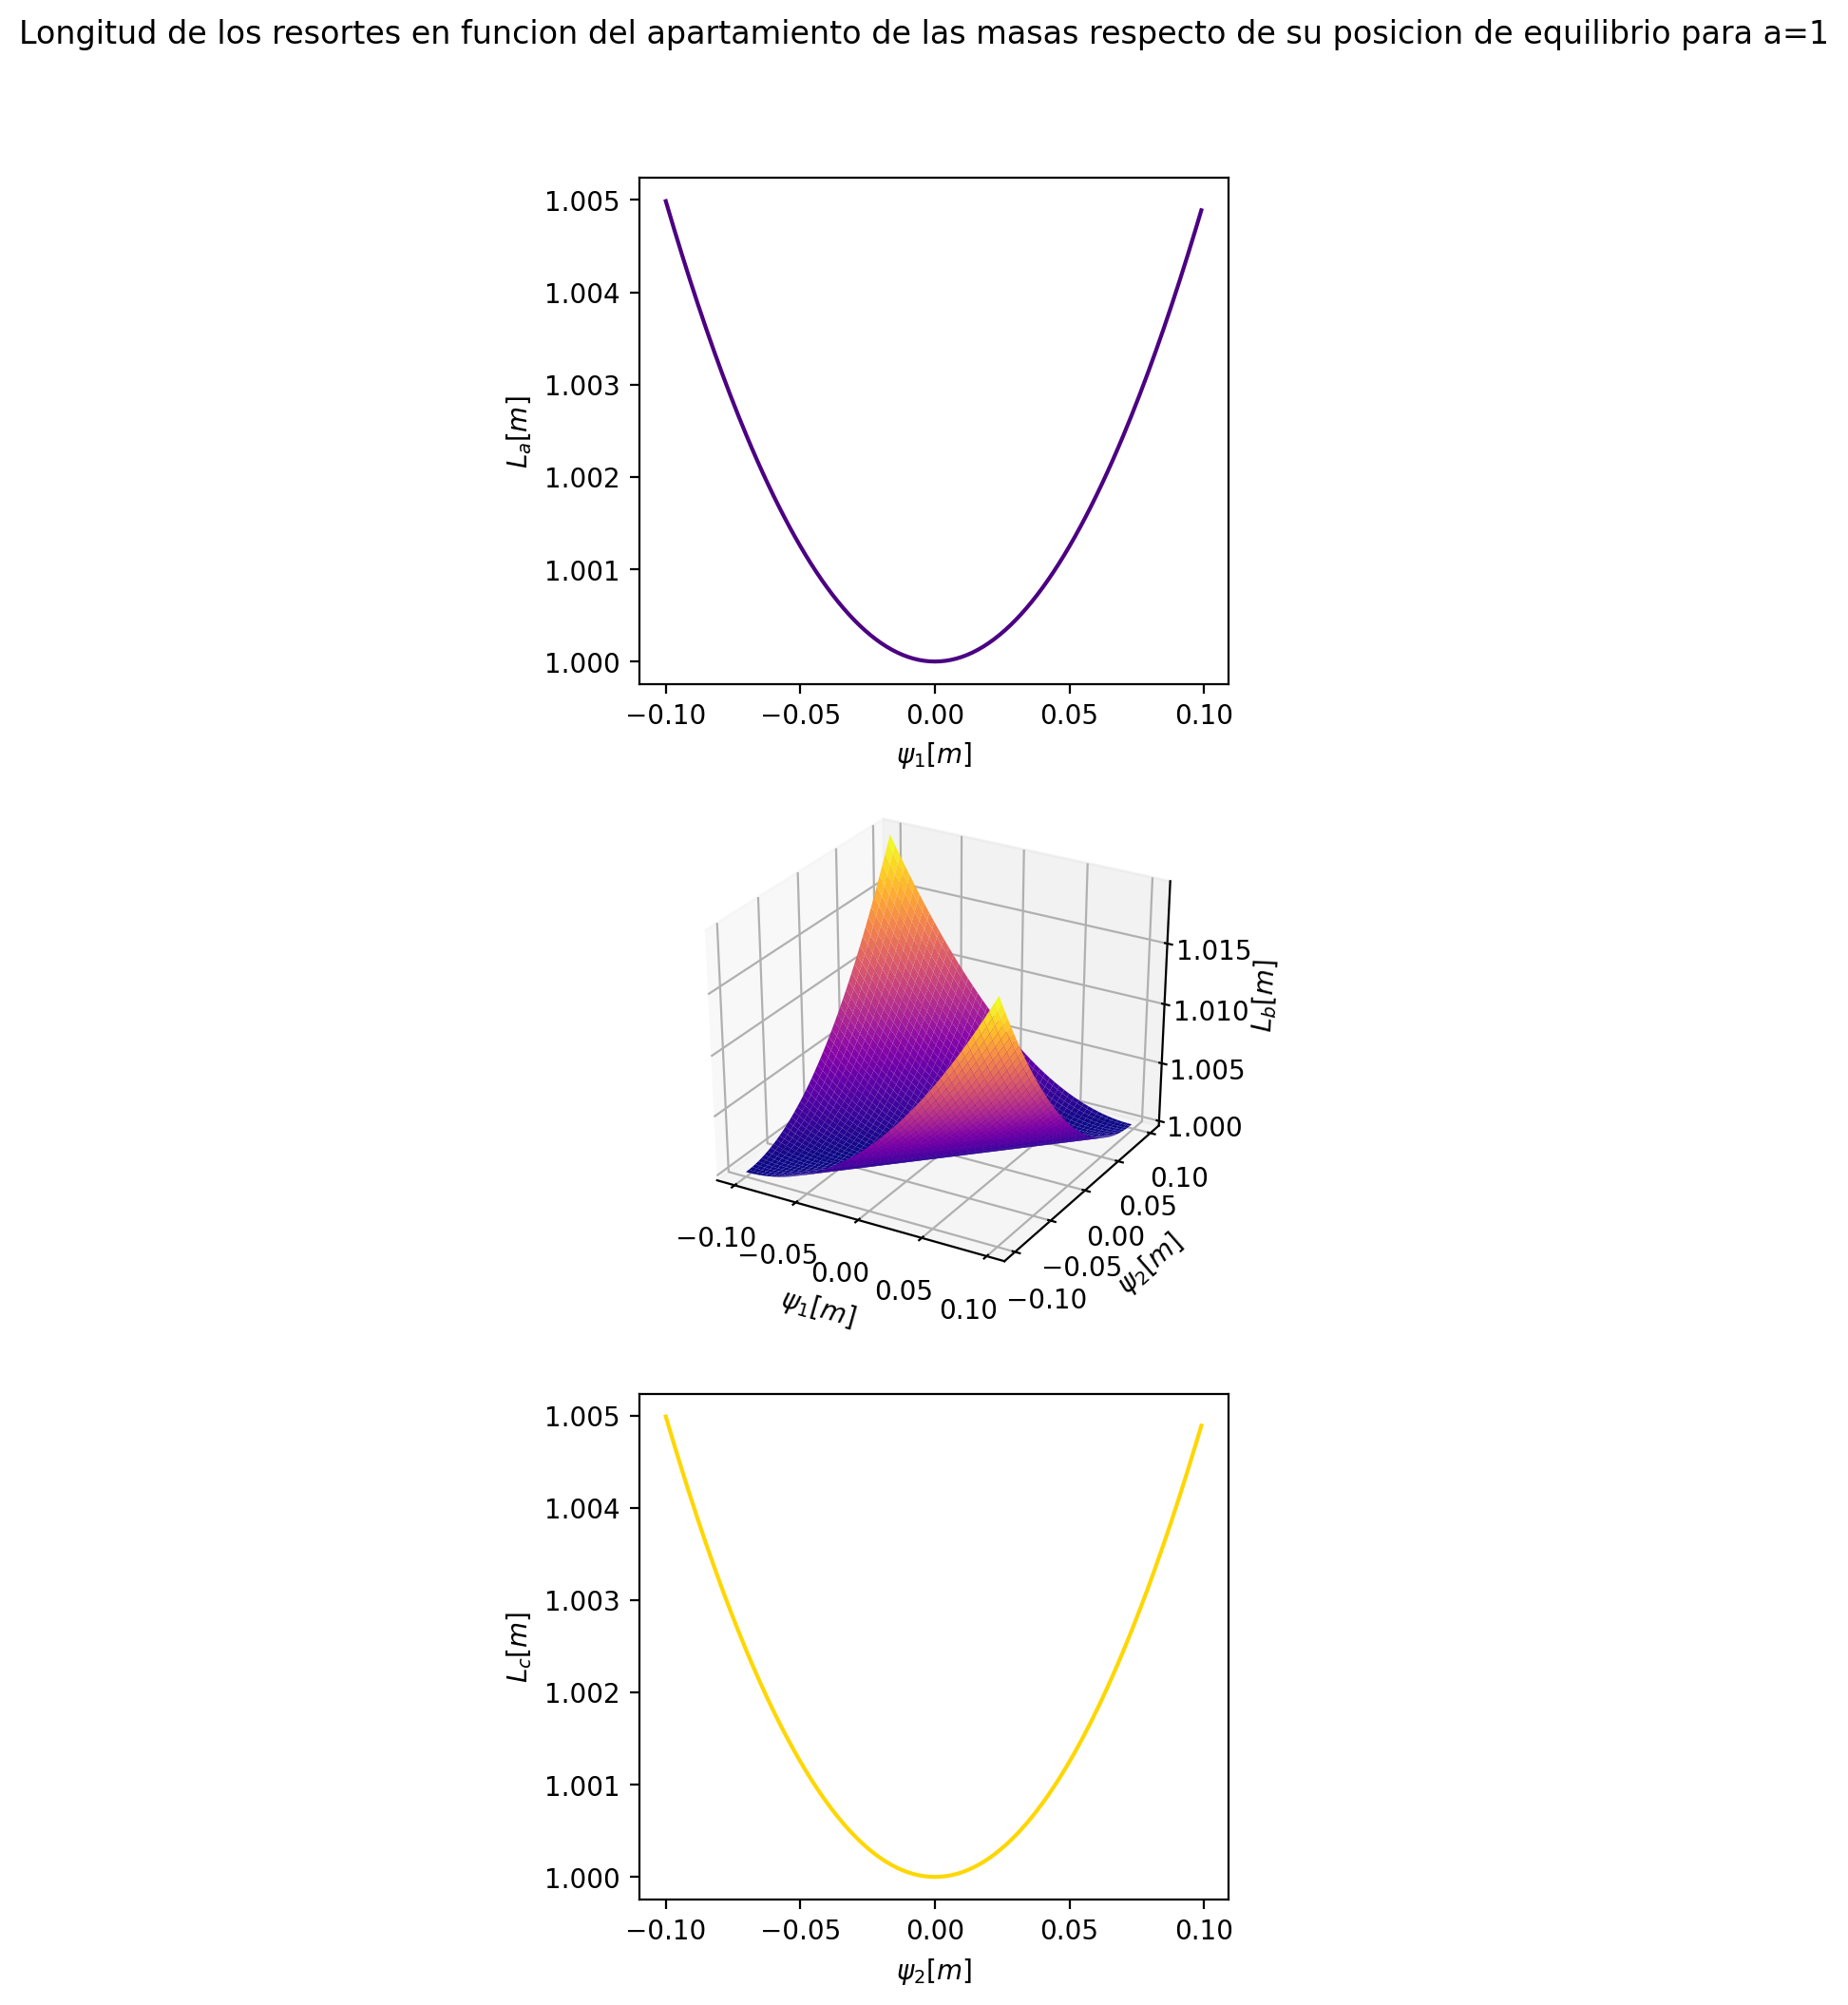

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

a_sub=[(a,1)]
pitag1=sp.lambdify((psi1),pitagoras[0].rhs.subs(a_sub),"numpy")
pitag2=sp.lambdify((psi1,psi2),pitagoras[1].rhs.subs(a_sub),"numpy")
pitag3=sp.lambdify((psi2),pitagoras[2].rhs.subs(a_sub),"numpy")

PSI_1=np.arange(-0.1,0.1,0.001)
PSI_2=np.arange(-0.1,0.1,0.001)
PSI_1x=np.arange(-0.1,0.1,0.001)
PSI_2y=np.arange(-0.1,0.1,0.001)
PSI_1x,PSI_2y=np.meshgrid(PSI_1x,PSI_2y)

data1=pitag1(PSI_1)
data2=pitag2(PSI_1x,PSI_2y)
data3=pitag3(PSI_2)

fig = plt.figure(figsize=plt.figaspect(3.),dpi=200)
fig.suptitle("Longitud de los resortes en funcion del apartamiento de las masas respecto de su posicion de equilibrio para a=1",y=0.95)

ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(PSI_1,data1,"Indigo")
ax1.set_xlabel(r'$\psi_1[m]$')
ax1.set_ylabel(r'$L_a[m]$')

ax2 = fig.add_subplot(3, 1, 2, projection='3d')
ax2.plot_surface(PSI_1x,PSI_2y,data2,cmap=cm.plasma)
ax2.set_xlabel(r'$\psi_1[m]$')
ax2.set_ylabel(r'$\psi_2[m]$')
ax2.set_zlabel(r'$L_b[m]$')

ax3 = fig.add_subplot(3, 1, 3)
ax3.plot(PSI_2,data3,"gold")
ax3.set_xlabel(r'$\psi_2[m]$')
ax3.set_ylabel(r'$L_c[m]$')

plt.show()

In [ ]:
senos_lin=[sp.Eq(sp.sin(alpha),psi1/pitagoras_lin[0].rhs),
       sp.Eq(sp.sin(beta),(psi1-psi2)/pitagoras_lin[1].rhs),
       sp.Eq(sp.sin(gamma),psi2/pitagoras_lin[2].rhs)]
senos_lin

In [ ]:
sustituciones2=[(sp.sin(alpha),senos_lin[0].rhs),
               (sp.sin(beta),senos_lin[1].rhs),
               (sp.sin(gamma),senos_lin[2].rhs),
               (la,pitagoras_lin[0].rhs),
               (lb,pitagoras_lin[1].rhs),
               (lc,pitagoras_lin[2].rhs)]

newton_lin=[newton[0].subs(sustituciones2).simplify(),newton[1].subs(sustituciones2).simplify()]
newton_lin

In [ ]:
ma=sp.Matrix([[sp.expand(newton_lin[0].rhs).coeff(psi1),sp.expand(newton_lin[0].rhs).coeff(psi2)],
             [sp.expand(newton_lin[1].rhs).coeff(psi1),sp.expand(newton_lin[1].rhs).coeff(psi2)]])
ma

⎡  K₁   K₁⋅ell₁   K₂   K₂⋅ell₂          K₂   K₂⋅ell₂         ⎤
⎢- ── + ─────── - ── + ───────          ── - ───────         ⎥
⎢  m      a⋅m     m      a⋅m            m      a⋅m           ⎥
⎢                                                            ⎥
⎢        K₂   K₂⋅ell₂             K₁   K₁⋅ell₁   K₂   K₂⋅ell₂⎥
⎢        ── - ───────           - ── + ─────── - ── + ───────⎥
⎣        m      a⋅m               m      a⋅m     m      a⋅m  ⎦

In [ ]:
ma.eigenvects()

⎡⎛-K₁⋅a + K₁⋅ell₁     ⎡⎡1⎤⎤⎞  ⎛-K₁⋅a + K₁⋅ell₁ - 2⋅K₂⋅a + 2⋅K₂⋅ell₂     ⎡⎡-1⎤⎤
⎢⎜───────────────, 1, ⎢⎢ ⎥⎥⎟, ⎜────────────────────────────────────, 1, ⎢⎢  ⎥⎥
⎣⎝      a⋅m           ⎣⎣1⎦⎦⎠  ⎝                a⋅m                      ⎣⎣1 ⎦⎦

⎞⎤
⎟⎥
⎠⎦

In [ ]:
omega1,omega2=sp.symbols("omega_1,omega_2",positive=True)
frecuencias=[sp.Eq(omega1**2,-ma.eigenvects()[0][0]),
             sp.Eq(omega2**2,-ma.eigenvects()[1][0])]

frecuencias

In [ ]:
a1,b1=sp.symbols("A_1 B_1")

modo1=sp.Eq(sp.Matrix([psi1,psi2]),ma.eigenvects()[0][2][0]*(a1*sp.cos(omega1*t)+b1*sp.sin(omega1*t)))
modo1

⎡ψ₁⎤   ⎡A₁⋅cos(ω₁⋅t) + B₁⋅sin(ω₁⋅t)⎤
⎢  ⎥ = ⎢                           ⎥
⎣ψ₂⎦   ⎣A₁⋅cos(ω₁⋅t) + B₁⋅sin(ω₁⋅t)⎦

In [ ]:
a2,b2=sp.symbols("A_2 B_2")
modo2=sp.Eq(sp.Matrix([psi1,psi2]),ma.eigenvects()[1][2][0]*(a2*sp.cos(omega2*t)+b2*sp.sin(omega2*t)))
modo2

⎡ψ₁⎤   ⎡-A₂⋅cos(ω₂⋅t) - B₂⋅sin(ω₂⋅t)⎤
⎢  ⎥ = ⎢                            ⎥
⎣ψ₂⎦   ⎣A₂⋅cos(ω₂⋅t) + B₂⋅sin(ω₂⋅t) ⎦

In [ ]:
sol=sp.Eq(sp.Matrix([psi1,psi2]),modo1.rhs+modo2.rhs)
sol

⎡ψ₁⎤   ⎡A₁⋅cos(ω₁⋅t) - A₂⋅cos(ω₂⋅t) + B₁⋅sin(ω₁⋅t) - B₂⋅sin(ω₂⋅t)⎤
⎢  ⎥ = ⎢                                                         ⎥
⎣ψ₂⎦   ⎣A₁⋅cos(ω₁⋅t) + A₂⋅cos(ω₂⋅t) + B₁⋅sin(ω₁⋅t) + B₂⋅sin(ω₂⋅t)⎦

In [ ]:
phi1,phi2=sp.symbols("phi_1 phi_2")
vel=sp.Eq(sp.Matrix([phi1,phi2]),sp.diff(sol.rhs,t))
vel

⎡φ₁⎤   ⎡-A₁⋅ω₁⋅sin(ω₁⋅t) + A₂⋅ω₂⋅sin(ω₂⋅t) + B₁⋅ω₁⋅cos(ω₁⋅t) - B₂⋅ω₂⋅cos(ω₂⋅t)
⎢  ⎥ = ⎢                                                                      
⎣φ₂⎦   ⎣-A₁⋅ω₁⋅sin(ω₁⋅t) - A₂⋅ω₂⋅sin(ω₂⋅t) + B₁⋅ω₁⋅cos(ω₁⋅t) + B₂⋅ω₂⋅cos(ω₂⋅t)

⎤
⎥
⎦

In [ ]:
p01,p02,v01,v02=sp.symbols("psi_1(0) psi_2(0) phi_1(0) phi_2(0)")
sustitucion=[(psi1,p01),(psi2,p02),(phi1,v01),(phi2,v02),(t,0)]
sist_iniciales=sol.subs(sustitucion),vel.subs(sustitucion)
sist_iniciales

⎛⎡ψ₁₍₀₎⎤   ⎡A₁ - A₂⎤  ⎡φ₁₍₀₎⎤   ⎡B₁⋅ω₁ - B₂⋅ω₂⎤⎞
⎜⎢     ⎥ = ⎢       ⎥, ⎢     ⎥ = ⎢             ⎥⎟
⎝⎣ψ₂₍₀₎⎦   ⎣A₁ + A₂⎦  ⎣φ₂₍₀₎⎦   ⎣B₁⋅ω₁ + B₂⋅ω₂⎦⎠

In [ ]:
coefsA=sp.solve(sist_iniciales[0])
coefsB=sp.solve(sist_iniciales[1])[0]
coefsA,coefsB

In [ ]:
subs=[(a1,coefsA[a1]),(a2,coefsA[a2]),(b1,coefsB[b1]),(b2,coefsB[b2])]
solucion=sol.subs(subs)
solucion

       ⎡  ⎛  ψ₁₍₀₎   ψ₂₍₀₎⎞             ⎛ψ₁₍₀₎   ψ₂₍₀₎⎞             (φ₁₍₀₎ - φ
       ⎢- ⎜- ───── + ─────⎟⋅cos(ω₂⋅t) + ⎜───── + ─────⎟⋅cos(ω₁⋅t) + ──────────
⎡ψ₁⎤   ⎢  ⎝    2       2  ⎠             ⎝  2       2  ⎠                       
⎢  ⎥ = ⎢                                                                      
⎣ψ₂⎦   ⎢ ⎛  ψ₁₍₀₎   ψ₂₍₀₎⎞             ⎛ψ₁₍₀₎   ψ₂₍₀₎⎞             (φ₁₍₀₎ - φ₂
       ⎢ ⎜- ───── + ─────⎟⋅cos(ω₂⋅t) + ⎜───── + ─────⎟⋅cos(ω₁⋅t) - ───────────
       ⎣ ⎝    2       2  ⎠             ⎝  2       2  ⎠                        

₂₍₀₎)⋅sin(ω₂⋅t)   (φ₁₍₀₎ + φ₂₍₀₎)⋅sin(ω₁⋅t)⎤
─────────────── + ─────────────────────────⎥
 2⋅ω₂                        2⋅ω₁          ⎥
                                           ⎥
₍₀₎)⋅sin(ω₂⋅t)   (φ₁₍₀₎ + φ₂₍₀₎)⋅sin(ω₁⋅t) ⎥
────────────── + ───────────────────────── ⎥
2⋅ω₂                        2⋅ω₁           ⎦

In [ ]:
velocidad=vel.subs(subs)
velocidad

       ⎡     ⎛ψ₁₍₀₎   ψ₂₍₀₎⎞                ⎛  ψ₁₍₀₎   ψ₂₍₀₎⎞             (φ₁₍
       ⎢- ω₁⋅⎜───── + ─────⎟⋅sin(ω₁⋅t) + ω₂⋅⎜- ───── + ─────⎟⋅sin(ω₂⋅t) + ────
⎡φ₁⎤   ⎢     ⎝  2       2  ⎠                ⎝    2       2  ⎠                 
⎢  ⎥ = ⎢                                                                      
⎣φ₂⎦   ⎢     ⎛ψ₁₍₀₎   ψ₂₍₀₎⎞                ⎛  ψ₁₍₀₎   ψ₂₍₀₎⎞             (φ₁₍
       ⎢- ω₁⋅⎜───── + ─────⎟⋅sin(ω₁⋅t) - ω₂⋅⎜- ───── + ─────⎟⋅sin(ω₂⋅t) - ────
       ⎣     ⎝  2       2  ⎠                ⎝    2       2  ⎠                 

₀₎ - φ₂₍₀₎)⋅cos(ω₂⋅t)   (φ₁₍₀₎ + φ₂₍₀₎)⋅cos(ω₁⋅t)⎤
───────────────────── + ─────────────────────────⎥
        2                           2            ⎥
                                                 ⎥
₀₎ - φ₂₍₀₎)⋅cos(ω₂⋅t)   (φ₁₍₀₎ + φ₂₍₀₎)⋅cos(ω₁⋅t)⎥
───────────────────── + ─────────────────────────⎥
        2                           2            ⎦

In [ ]:
cons_sistema=[(k1,10),(k2,5),(m,0.5),(l1,0.1),(a,1)]
constantes_sistema=cons_sistema+[(l2,ecuacion_longitd2.rhs.subs(cons_sistema))]
constantes_sistema

In [ ]:
frecs_evaluadas=[(omega1,sp.sqrt(frecuencias[0].rhs).subs(constantes_sistema)),
                 (omega2,sp.sqrt(frecuencias[1].rhs).subs(constantes_sistema))]
frecs_evaluadas

### Modo 1

In [ ]:
iniciales=([(p01,0.2),(p02,0.2),(v01,0),(v02,0)])
iniciales

In [ ]:
posicion1=sp.lambdify(t,solucion.rhs[0].subs(constantes_sistema+frecs_evaluadas+iniciales),"numpy")
posicion2=sp.lambdify(t,solucion.rhs[1].subs(constantes_sistema+frecs_evaluadas+iniciales),"numpy")
tiempo=np.arange(0,30,0.1)

In [ ]:
%%capture

from matplotlib.animation import FuncAnimation

figura_1, axes_1 = plt.subplots(figsize=(8,3))

axes_1.set_aspect("equal")
axes_1.set_xlim(-8,8)
axes_1.set_ylim(-2.5,2.5)
axes_1.set_xticks(np.arange(-7.5,7.5,1))
axes_1.set_yticks(np.arange(-2.5,2.5,1))
soporteI,=axes_1.plot([-7.5,-7.5],[-2,2],"k",markersize=4)
soporteD,=axes_1.plot([7.5,7.5],[-2,2],"k",markersize=4)
equilibrio,=axes_1.plot([-2.5,2.5],[0,0],'r+')
masas,=axes_1.plot([],[],'ko',markersize=10)
resortea,=axes_1.plot([],[],"k-.")
resorteb,=axes_1.plot([],[],"k-.")
resortec,=axes_1.plot([],[],"k-.")

def cuadro(t):
    a=posicion1(t)
    b=posicion2(t)
    resortea.set_xdata([-7.5,-2.5])
    resortea.set_ydata([0,a])
    resorteb.set_xdata([-2.5,2.5])
    resorteb.set_ydata([a,b])
    resortec.set_xdata([2.5,7.5])
    resortec.set_ydata([b,0])
    masas.set_xdata([-2.5,2.5])
    masas.set_ydata([a,b])
    return 

animacion = FuncAnimation(figura_1,func=cuadro,frames=tiempo,interval=100)

In [ ]:
from IPython.display import HTML
from matplotlib import animation, rc

rc('animation', html='jshtml')
animacion

### Modo 2

In [ ]:
iniciales=([(p01,0.2),(p02,-0.2),(v01,0),(v02,0)])
iniciales

In [ ]:
posicion1=sp.lambdify(t,solucion.rhs[0].subs(constantes_sistema+frecs_evaluadas+iniciales),"numpy")
posicion2=sp.lambdify(t,solucion.rhs[1].subs(constantes_sistema+frecs_evaluadas+iniciales),"numpy")

In [ ]:
%%capture

figura_1, axes_1 = plt.subplots(figsize=(8,3))

axes_1.set_aspect("equal")
axes_1.set_xlim(-8,8)
axes_1.set_ylim(-2.5,2.5)
axes_1.set_xticks(np.arange(-7.5,7.5,1))
axes_1.set_yticks(np.arange(-2.5,2.5,1))
soporteI,=axes_1.plot([-7.5,-7.5],[-2,2],"k",markersize=4)
soporteD,=axes_1.plot([7.5,7.5],[-2,2],"k",markersize=4)
equilibrio,=axes_1.plot([-2.5,2.5],[0,0],'r+')
masas,=axes_1.plot([],[],'ko',markersize=10)
resortea,=axes_1.plot([],[],"k-.")
resorteb,=axes_1.plot([],[],"k-.")
resortec,=axes_1.plot([],[],"k-.")

def cuadro(t):
    a=posicion1(t)
    b=posicion2(t)
    resortea.set_xdata([-7.5,-2.5])
    resortea.set_ydata([0,a])
    resorteb.set_xdata([-2.5,2.5])
    resorteb.set_ydata([a,b])
    resortec.set_xdata([2.5,7.5])
    resortec.set_ydata([b,0])
    masas.set_xdata([-2.5,2.5])
    masas.set_ydata([a,b])
    return 

animacion = FuncAnimation(figura_1,func=cuadro,frames=tiempo,interval=100)

In [ ]:
rc('animation', html='jshtml')
animacion